# ST2195 Coursework question 1 

### UOL Student Number 200549079

# Importing & Loading Necessary Packages 

In [1]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working Directory

In [2]:
# Input your own directory where the Harvard Dataverse files are located within the code below.
os.chdir("C:\\Users\\Sudharsaan\\OneDrive\\SIM\\Year 2\\ST2195 Programming for Data Science\\Coursework\\Essential Harvard Dataverse Files")
os.getcwd()

'C:\\Users\\Sudharsaan\\OneDrive\\SIM\\Year 2\\ST2195 Programming for Data Science\\Coursework\\Essential Harvard Dataverse Files'

# Creating airlinemain_py database

In [3]:
os.remove("airlinemain_py.db")

In [4]:
conn = sqlite3.connect("airlinemain_py.db")

## Creating tables in database

In [5]:
ontime2006 = pd.read_csv("2006.csv.bz2")
ontime2007 = pd.read_csv("2007.csv.bz2")

ontime2006.to_sql("ontime", con = conn, index = False)

conn.commit()

In [6]:
ontime2007.to_sql("ontime", con = conn, index = False, if_exists = "append")
conn.commit()

In [7]:
planesdata = pd.read_csv("plane-data.csv")
planesdata.to_sql("planes", conn, index = False)

In [8]:
carriers = pd.read_csv("carriers.csv")
carriers.to_sql("carriers", conn, index = False)

In [9]:
airports = pd.read_csv("airports.csv")
airports.to_sql("airports", conn, index = False)

# Performing Query on question 1 of coursework

The query on question 1 will be split into 3 parts. 
1. Analyse the best month of the year to fly to minimize delays.
2. Analyse the best day of week to fly to minimize delays.
3. Analyse the best time of day to fly to minimize delays. 

## Analysing best month of year to fly to minimize delays

In [10]:
c = conn.cursor()

In [11]:
# Querying from airlinemain_py.db database to extract information regarding percentage of cancelled flights, percentage of 
# diverted flights, & percentage of delayed flights in each month for years 2006 & 2007 combined. 
q1a1 = c.execute('''
                    SELECT Month, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime
                    GROUP BY Month
                    ORDER BY Month''').fetchall()

In [12]:
q1a1 = pd.DataFrame(q1a1)
q1a1 = q1a1.rename(columns={0: "Month", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of Delayed flights"})
q1a1

,Month,% of Cancelled flights,% of Diverted flights,% of Delayed flights
0,1,2.125293,0.213660,43.187407
1,2,3.351230,0.234307,47.195380
2,3,1.965806,0.187074,45.493987
3,4,1.478501,0.185167,43.595036
4,5,1.125774,0.216925,43.122797
5,6,2.226386,0.326492,50.038001
6,7,1.909035,0.317214,48.541192
7,8,1.722138,0.286347,46.365827
8,9,1.388631,0.185550,40.552887
9,10,1.508082,0.179833,45.592288


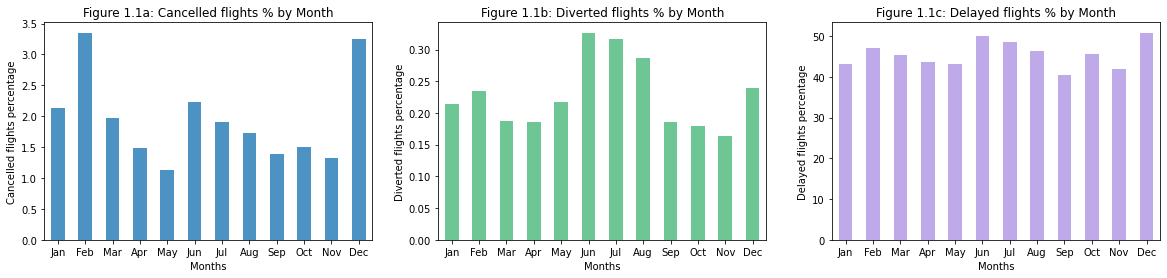

In [13]:
Month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(1, 3, figsize = (20, 4))

# Creating a plot for the percentage of cancelled flights in each month in 2006 & 2007 combined. 
q1a1[["Month","% of Cancelled flights"]].plot.bar("Month", "% of Cancelled flights", ax = ax[0], alpha = 0.8, 
                                                  legend = False, rot = 0)

ax[0].set_xticklabels(Month_names)
ax[0].set_xlabel("Months")
ax[0].set_ylabel("Cancelled flights percentage")
ax[0].title.set_text("Figure 1.1a: Cancelled flights % by Month")

# Creating a plot for the percentage of diverted flights in each month in 2006 & 2007 combined.
q1a1[["Month","% of Diverted flights"]].plot.bar("Month", "% of Diverted flights", ax = ax[1], alpha = 0.75, 
                                                 color = "mediumseagreen", legend = False, rot = 0)

ax[1].set_xticklabels(Month_names)
ax[1].set_xlabel("Months")
ax[1].set_ylabel("Diverted flights percentage")
ax[1].title.set_text("Figure 1.1b: Diverted flights % by Month")

# Creating a plot for the percentage of delayed flights in each month in 2006 & 2007 combined. 
q1a1[["Month","% of Delayed flights"]].plot.bar("Month", "% of Delayed flights", ax = ax[2], alpha = 0.6, 
                                                color = "mediumpurple", legend = False, rot = 0)

ax[2].set_xticklabels(Month_names)
ax[2].set_xlabel("Months")
ax[2].set_ylabel("Delayed flights percentage")
ax[2].title.set_text("Figure 1.1c: Delayed flights % by Month")

**Observations from results above**

The **percentage of cancelled flights** is lowest in **May** (1.13%), followed by November (1.33%) & September (1.39%). The **percentage of diverted flights** is lowest in **November** (0.16%), followed by October (0.18%) & September (0.19%). The **percentage of delayed flights** is lowest in **September** (40.55%), followed by November (42.00%) & May (43.12%). 

In [14]:
# Querying from airlinemain_py.db database to extract information regarding average arrival delay in each month for years 
# 2006 & 2007.
q1a2 = c.execute('''
                    SELECT Month, AVG(ArrDelay)
                    FROM ontime
                    WHERE Cancelled = 0 AND Diverted = 0
                    GROUP BY Month
                    ORDER BY Month''').fetchall()

In [15]:
q1a2 = pd.DataFrame(q1a2)
q1a2 = q1a2.rename(columns={0: "Month", 1 : "Avg Arrival Delay (mins)"})
q1a2

,Month,Avg Arrival Delay (mins)
0,1,7.447226
1,2,10.498526
2,3,9.027283
3,4,7.491780
4,5,6.964305
5,6,14.153010
6,7,12.736940
7,8,10.662703
8,9,6.034441
9,10,8.559212


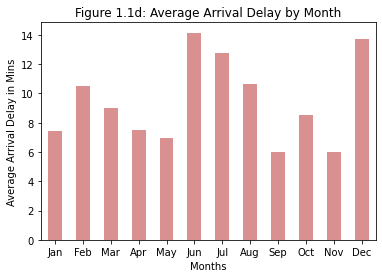

In [16]:
fig, ax = plt.subplots()

# Creating a plot for the average arrival delay in each month in 2006 & 2007 combined.
q1a2[["Month","Avg Arrival Delay (mins)"]].plot.bar("Month", "Avg Arrival Delay (mins)", ax = ax, alpha = 0.5, 
                                                    legend = False, rot = 0, color = "firebrick")

ax.set_xticklabels(Month_names)
ax.set_xlabel("Months")
ax.set_ylabel("Average Arrival Delay in Mins")
ax.title.set_text("Figure 1.1d: Average Arrival Delay by Month")

**Observations from results above**

The month with the **lowest average arrival delay** is **November** (6.00 mins), followed by September (6.03 mins) & May (6.96 mins). 

**Overall decision on best month to fly**

Since the percentage of cancelled & diverted flights are extremely low, we shall not take them into consideration for choosing best month to fly. The main determinants for the best month to fly would be the percentage of delayed flights & the average arrival delay in each month. From the results above, **September** & **November** are the **best months** to fly as the percentage of delayed flights & the average arrival delay is lowest in those months. The values with respect to both Months are very similar & thus we do not have a clear answer regarding the best month to fly. Thus, we choose both months September & November as the best months to fly.  

## Analysing best day of week to fly to minimize delays

In [17]:
# Querying from airlinemain_py.db database to extract information regarding percentage of cancelled flights, percentage of 
# diverted flights, & percentage of delayed flights by day of week for years 2006 & 2007 combined. 
q1b1 = c.execute('''
                    SELECT DayOfWeek, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime
                    GROUP BY DayOfWeek
                    ORDER BY DayOfWeek''').fetchall()

In [18]:
q1b1 = pd.DataFrame(q1b1)
q1b1 = q1b1.rename(columns={0: "Day of Week", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of Delayed flights"})
q1b1

,Day of Week,% of Cancelled flights,% of Diverted flights,% of Delayed flights
0,1,1.846401,0.224667,45.835000
1,2,1.968434,0.215043,42.339930
2,3,2.097044,0.231118,44.630760
3,4,2.186139,0.252105,48.900793
4,5,2.119451,0.247603,50.436757
5,6,1.490614,0.191558,40.577150
6,7,1.778258,0.232546,45.427287


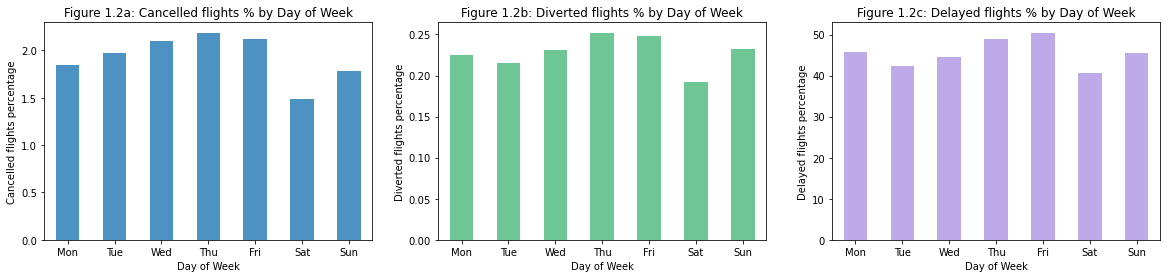

In [19]:
Day_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

fig, ax = plt.subplots(1, 3, figsize = (20, 4))

q1b1[["Day of Week", "% of Cancelled flights"]].plot.bar("Day of Week", "% of Cancelled flights", ax = ax[0], alpha = 0.8, legend = False, rot = 0)

# Creating a plot for the percentage of cancelled flights by day of week in 2006 & 2007 combined. 
ax[0].set_xticklabels(Day_of_week)
ax[0].set_xlabel("Day of Week")
ax[0].set_ylabel("Cancelled flights percentage")
ax[0].title.set_text("Figure 1.2a: Cancelled flights % by Day of Week")

# Creating a plot for the percentage of diverted flights by day of week in 2006 & 2007 combined. 
q1b1[["Day of Week", "% of Diverted flights"]].plot.bar("Day of Week", "% of Diverted flights", ax = ax[1], alpha = 0.75, color = "mediumseagreen", legend = False, rot = 0)

ax[1].set_xticklabels(Day_of_week)
ax[1].set_xlabel("Day of Week")
ax[1].set_ylabel("Diverted flights percentage")
ax[1].title.set_text("Figure 1.2b: Diverted flights % by Day of Week")

# Creating a plot for the percentage of delayed flights by day of week in 2006 & 2007 combined. 
q1b1[["Day of Week", "% of Delayed flights"]].plot.bar("Day of Week", "% of Delayed flights", ax = ax[2], alpha = 0.6, color = "mediumpurple", legend = False, rot = 0)

ax[2].set_xticklabels(Day_of_week)
ax[2].set_xlabel("Day of Week")
ax[2].set_ylabel("Delayed flights percentage")
ax[2].title.set_text("Figure 1.2c: Delayed flights % by Day of Week")

**Observations from results above**

The **percentage of cancelled flights** is lowest in **Saturday** (1.49%), followed by Sunday (1.78%) & Monday (1.84%). The **percentage of diverted flights** is lowest in **Saturday** (0.19%), followed by Tuesday (0.22%) & Monday (0.22%). The **percentage of delayed flights** is lowest in **Saturday** (40.58%), followed by Tuesday (42.34%) & Wednesday (44.63%). 

In [20]:
# Querying from airlinemain_py.db database to extract information regarding average arrival delay by day of week for years 
# 2006 & 2007.
q1b2 = c.execute('''
                    SELECT DayOfWeek, AVG(ArrDelay)
                    FROM ontime
                    WHERE Cancelled = 0 AND Diverted = 0
                    GROUP BY DayOfWeek
                    ORDER BY DayOfWeek''').fetchall()

In [21]:
q1b2 = pd.DataFrame(q1b2)
q1b2 = q1b2.rename(columns={0: "Day of Week", 1 : "Avg Arrival Delay (mins)"})
q1b2

,Day of Week,Avg Arrival Delay (mins)
0,1,9.701637
1,2,7.248411
2,3,8.987954
3,4,12.141524
4,5,12.701676
5,6,5.513355
6,7,9.247222


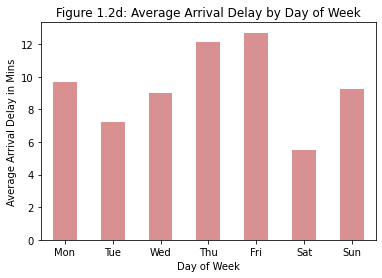

In [22]:
fig, ax = plt.subplots()

# Creating a plot for the average arrival delay by day of week in 2006 & 2007 combined.
q1b2.plot.bar("Day of Week", "Avg Arrival Delay (mins)", ax = ax, alpha = 0.5, legend = False, rot = 0, color = "firebrick")

ax.set_xticklabels(Day_of_week)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Arrival Delay in Mins")
ax.title.set_text("Figure 1.2d: Average Arrival Delay by Day of Week")

**Observations from results above**

The day of week with the **lowest average arrival delay** is **Saturday** (5.51 mins), followed by Tuesday (7.25 mins) & Wednesday (8.99 mins). 

**Overall decision on best day of week to fly**

Once again, since the percentage of cancelled & diverted flights are extremely low, we shall not take them into consideration for choosing best day of week to fly. The main determinants for the best day of week to fly would be the percentage of delayed flights & the average arrival delay by day of week. From the results above, **Saturday** is the **best day of week** to fly as the percentage of delayed flights & the average arrival delay is lowest in Saturday compared to other days of the week. Even when taking percentage of cancelled & diverted flights into consideration, Saturday remains to have the lowest percentage which sets it as the best day of the week to fly. 

## Analysing best time of day to fly to minimize delays

### Additional Information

We partition the time of day by **12**, **2-hour time intervals**, as the code below shows that the average time for flights to travel from one location to another is **102.83 mins** which is approximately 1 hour & 40 mins. Thus, it is appropriate to use 2-hour time intervals for the analysis.

In [23]:
# Determining the average time it takes for flights to travel from one location to another so as to choose an appropriate 
# time interval to partition 24 hours in a day. 
q1c0 = c.execute('''
                    SELECT AVG(Airtime) as Avg_Flight_Travel_Time
                    FROM ontime
                    WHERE Cancelled = 0''').fetchall()

q1c0 = pd.DataFrame(q1c0)
q1c0 = q1c0.rename(columns={0: "Average Flight Time"})
q1c0

,Average Flight Time
0,102.834872


In [24]:
# Querying from airlinemain_py.db database to extract information regarding percentage of cancelled flights, percentage of 
# diverted flights, & percentage of delayed flights by time of day for years 2006 & 2007 combined. 
q1c1 = c.execute('''
                    SELECT (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100),
                    CASE WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
                         WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
                         WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
                         WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
                         WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
                         WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
                         WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
                         WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
                         WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
                         WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
                         WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
                         WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
                         END AS TimeFrame
                    FROM ontime
                    GROUP BY CASE WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
                                  WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
                                  WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
                                  WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
                                  WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
                                  WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
                                  WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
                                  WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
                                  WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
                                  WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
                                  WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
                                  WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
                                  END
                    ORDER BY TimeFrame''').fetchall()

In [25]:
q1c1 = pd.DataFrame(q1c1)
q1c1 = q1c1[[3,0,1,2]] # Using indexing to rearrange columns in an appropriate manner
q1c1 = q1c1.rename(columns={3 : "Time interval", 0 : "% of Cancelled flights", 1 : "% of Diverted flights", 2 : "% of Delayed flights"})
q1c1

,Time interval,% of Cancelled flights,% of Diverted flights,% of Delayed flights
0,0000 to 0159,0.704148,0.138641,41.446240
1,0200 to 0359,0.949743,0.079145,40.522359
2,0400 to 0559,2.021723,0.264618,31.347778
3,0600 to 0759,1.731236,0.238205,34.295530
4,0800 to 0959,1.639799,0.181882,39.584104
5,1000 to 1159,1.667328,0.215628,42.961064
6,1200 to 1359,1.761302,0.260658,46.077362
7,1400 to 1559,2.019878,0.278768,49.425974
8,1600 to 1759,2.442924,0.252030,51.871674
9,1800 to 1959,2.411165,0.208090,52.541861


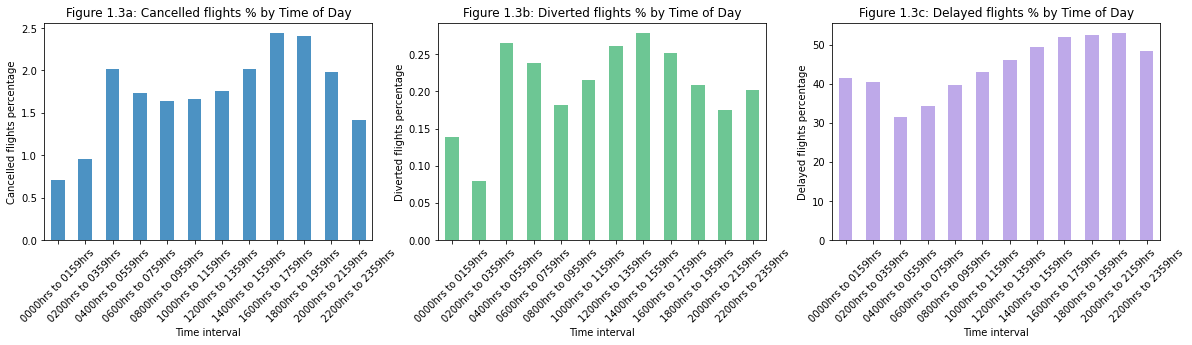

In [26]:
Time_interval_names = ["0000hrs to 0159hrs", "0200hrs to 0359hrs", "0400hrs to 0559hrs", "0600hrs to 0759hrs", "0800hrs to 0959hrs", "1000hrs to 1159hrs", "1200hrs to 1359hrs", "1400hrs to 1559hrs", "1600hrs to 1759hrs", "1800hrs to 1959hrs", "2000hrs to 2159hrs", "2200hrs to 2359hrs"]

fig, ax = plt.subplots(1, 3, figsize = (20, 4))

# Creating a plot for the percentage of cancelled flights by time of day in 2006 & 2007 combined. 
q1c1[["Time interval","% of Cancelled flights"]].plot.bar(0, 1, ax = ax[0], alpha = 0.8, legend = False, rot = 45)

ax[0].set_xticklabels(Time_interval_names)
ax[0].set_xlabel("Time interval")
ax[0].set_ylabel("Cancelled flights percentage")
ax[0].title.set_text("Figure 1.3a: Cancelled flights % by Time of Day")

# Creating a plot for the percentage of diverted flights by time of day in 2006 & 2007 combined. 
q1c1[["Time interval","% of Diverted flights"]].plot.bar(0, 1, ax = ax[1], alpha = 0.75, legend = False, rot = 45, color = "mediumseagreen")

ax[1].set_xticklabels(Time_interval_names)
ax[1].set_xlabel("Time interval")
ax[1].set_ylabel("Diverted flights percentage")
ax[1].title.set_text("Figure 1.3b: Diverted flights % by Time of Day")

# Creating a plot for the percentage of delayed flights by time of day in 2006 & 2007 combined. 
q1c1[["Time interval","% of Delayed flights"]].plot.bar(0, 1, ax = ax[2], alpha = 0.6, legend = False, rot = 45, color = "mediumpurple")

ax[2].set_xticklabels(Time_interval_names)
ax[2].set_xlabel("Time interval")
ax[2].set_ylabel("Delayed flights percentage")
ax[2].title.set_text("Figure 1.3c: Delayed flights % by Time of Day")

**Observations from results above**

The **percentage of cancelled flights** is lowest during the time interval of **0000hrs to 0159hrs** (0.70%), followed by 0200hrs to 0359hrs (0.95%) & 2200hrs to 2359hrs (1.41%). The **percentage of diverted flights** is lowest in **0200hrs to 0359hrs** (0.08%), followed by 0000hrs to 0159hrs (0.14%) & 2000hrs to 2159hrs (0.18%). The **percentage of delayed flights** is lowest in **0400hrs to 0559hrs** (31.35%), followed by 0600hrs to 0759hrs (34.30%) & 0800hrs to 0959hrs (39.58%). 

In [27]:
# Querying from airlinemain_py.db database to extract information regarding average arrival delay by time of day for years 
# 2006 & 2007.
q1c2 = c.execute('''
                    SELECT (AVG(ArrDelay)),
                    CASE WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
                         WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
                         WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
                         WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
                         WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
                         WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
                         WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
                         WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
                         WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
                         WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
                         WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
                         WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
                         END AS TimeFrame
                    FROM ontime
                    WHERE Cancelled = 0 AND Diverted = 0
                    GROUP BY CASE WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
                                  WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
                                  WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
                                  WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
                                  WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
                                  WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
                                  WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
                                  WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
                                  WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
                                  WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
                                  WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
                                  WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
                                  END
                    ORDER BY TimeFrame''').fetchall()

In [28]:
q1c2 = pd.DataFrame(q1c2)
q1c2 = q1c2[[1,0]] # Using indexing to rearrange columns in an appropriate manner
q1c2 = q1c2.rename(columns={1 : "Time interval", 0 : "Avg Arrival Delay (mins)"})
q1c2

,Time interval,Avg Arrival Delay (mins)
0,0000 to 0159,3.508904
1,0200 to 0359,4.502999
2,0400 to 0559,0.738958
3,0600 to 0759,1.297589
4,0800 to 0959,3.815354
5,1000 to 1159,5.955356
6,1200 to 1359,9.026592
7,1400 to 1559,12.374599
8,1600 to 1759,15.496993
9,1800 to 1959,16.668321


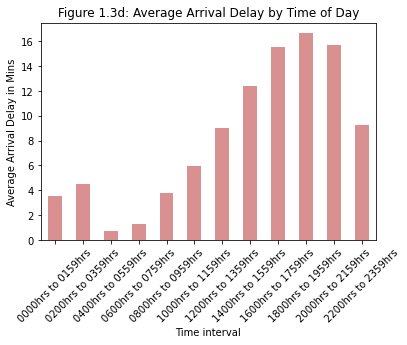

In [29]:
fig, ax = plt.subplots()

# Creating a plot for the average arrival delay by time of day in 2006 & 2007 combined.
q1c2[["Time interval","Avg Arrival Delay (mins)"]].plot.bar(0, 1, ax = ax, alpha = 0.5, legend = False, rot = 45, color = "firebrick")

ax.set_xticklabels(Time_interval_names)
ax.set_xlabel("Time interval")
ax.set_ylabel("Average Arrival Delay in Mins")
ax.title.set_text("Figure 1.3d: Average Arrival Delay by Time of Day")

**Observations from results above**

The time of day with the **lowest average arrival delay** is the time interval of **0400hrs to 0559hrs** (0.74 mins), followed by 0600hrs to 0759hrs (1.30 mins) & 0000hrs to 0159hrs (3.51 mins). 

**Overall decision on best day of week to fly**

Once again, since the percentage of cancelled & diverted flights are extremely low, we shall not take them into consideration for choosing best time of day to fly. The main determinants for the best time of day to fly would be the percentage of delayed flights & the average arrival delay by time of day. From the results above, **0400hrs to 0559hrs** is the **best time of day** to fly as the percentage of delayed flights & the average arrival delay is lowest during the time interval of 0400hrs to 0559hrs compared to other time intervals within a day.

In [30]:
# Closing connection to airlinemain_py.db
conn.close()